In [31]:
import csv
import random
import math
import operator

import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

## Comparing Apple's stock with competitors' stocks

This segment will analyse on how Apple performs in relative with its competitors, and whether we can use similar approaches to predict those stocks.

In [32]:
stock_apple = 'aapl'
stock_ge = 'ge'
stock_google = 'goog'
stock_ibm = 'ibm'
stock_microsoft = 'msft'

df_aapl = pd.read_csv('%s.us.txt' % stock_apple, index_col=0)
df_aapl.drop('OpenInt', inplace=True, axis=1) # OpenInt column seems to be useless
df_aapl.rename(columns = {'Close':'AAPL'}, inplace = True)

df_ge = pd.read_csv('%s.us.txt' % stock_ge, index_col=0)
df_ge.drop('OpenInt', inplace=True, axis=1) # OpenInt column seems to be useless
df_ge.rename(columns = {'Close':'GE'}, inplace = True)

df_goog = pd.read_csv('%s.us.txt' % stock_google, index_col=0)
df_goog.drop('OpenInt', inplace=True, axis=1) # OpenInt column seems to be useless
df_goog.rename(columns = {'Close':'GOOG'}, inplace = True)

df_ibm = pd.read_csv('%s.us.txt' % stock_ibm, index_col=0)
df_ibm.drop('OpenInt', inplace=True, axis=1) # OpenInt column seems to be useless
df_ibm.rename(columns = {'Close':'IBM'}, inplace = True)

df_msft = pd.read_csv('%s.us.txt' % stock_microsoft, index_col=0)
df_msft.drop('OpenInt', inplace=True, axis=1) # OpenInt column seems to be useless
df_msft.rename(columns = {'Close':'MSFT'}, inplace = True)


df_temp1 = pd.merge(df_aapl['AAPL'], df_ge['GE'], how='inner', on='Date')
df_temp2 = pd.merge(df_temp1, df_goog['GOOG'], how='inner', on='Date')
df_temp3 = pd.merge(df_temp2, df_ibm['IBM'], how='inner', on='Date')
df_comp = pd.merge(df_temp3, df_msft['MSFT'], how='inner', on='Date')

df_comp.head(10)

,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2014-03-27,71.611,22.960,558.46,167.34,35.954
2014-03-28,71.531,23.020,559.99,167.90,36.814
2014-03-31,71.513,23.030,556.97,169.68,37.441
2014-04-01,72.168,23.011,567.16,171.45,37.834
2014-04-02,72.290,23.165,567.00,170.62,37.769
2014-04-03,71.787,23.331,569.74,169.87,37.459
2014-04-04,70.858,23.145,543.14,169.06,36.419
2014-04-07,69.746,22.993,538.15,171.47,36.355
2014-04-08,69.741,22.904,554.90,170.38,36.374


### Correlation Analysis

We run a percentage change and correlation function in pandas to analyse the various stocks. Percentage change can see how much price changes compared to the previous day which will give us the returns. Getting the correlation can help us see if the returns are affected by the other stocks' returns.

In [33]:
return_comp = df_comp.pct_change()
corr = return_comp.corr()
corr.head()

,AAPL,GE,GOOG,IBM,MSFT
AAPL,1.000000,0.301626,0.399243,0.301416,0.469998
GE,0.301626,1.000000,0.314059,0.434169,0.380935
GOOG,0.399243,0.314059,1.000000,0.336044,0.572938
IBM,0.301416,0.434169,0.336044,1.000000,0.419150
MSFT,0.469998,0.380935,0.572938,0.419150,1.000000


Below is a plot showing the return distributions between Apple and Microsoft.

Text(0, 0.5, 'Returns MSFT')

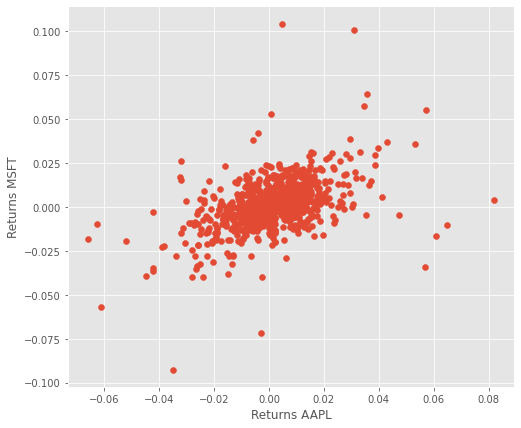

In [34]:
plt.scatter(return_comp.AAPL, return_comp.MSFT)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns MSFT')

There is a slight positive correlation among the returns of Apple and Microsoft. Meaning that the higher the returns for Apple, the higher the returns for Microsoft generally.

Below we will plot a similar gragh showing the relation between each and every company. For the diagonal plot, a Kernal Density Estimate (KDE) is used to help generate estimations of the overall distribution.

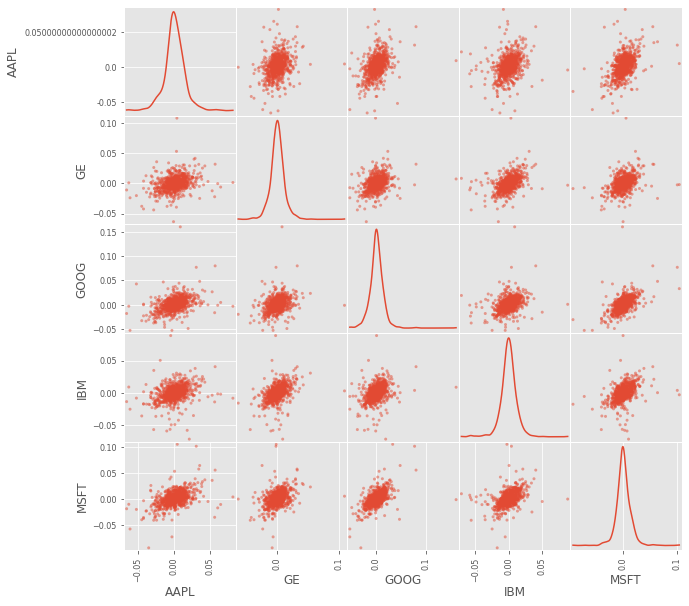

In [35]:
scatter_matrix(return_comp, diagonal='kde', figsize=(10, 10));

From the scatter matrix above, we can see that there is slight positive correlations among the various stocks. We can better visualise the positive correlations using a heat map.

([<matplotlib.axis.YTick at 0x12dd30cd0>,
 [Text(0, 0, 'AAPL'),
  Text(0, 1, 'GE'),
  Text(0, 2, 'GOOG'),
  Text(0, 3, 'IBM'),
  Text(0, 4, 'MSFT')])

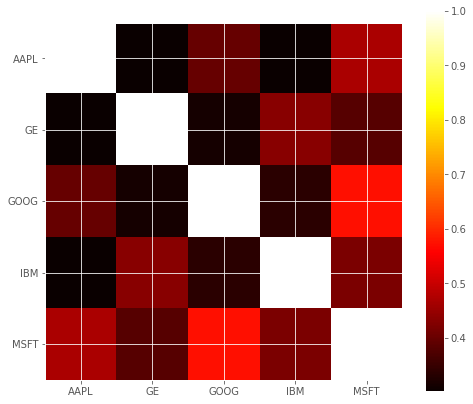

In [36]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Note that the lighter the colour, the more correlated the 2 stocks are.

From the heat map and the scatter matrix, we can tell that there are correlations between the competitive technological companies. We need to note that this does not show causality, as it might be due to the trend for the tech industry over the years. However it is also possible that the companies' stocks can affect one another.